In [142]:
import os
os.chdir('G:\\freecloud\\ThinkpadC_space\\Desktop\\资料\\资料\\量化投资：以Python为工具\\Python Quant Book\\part 5\\031')

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [144]:
ChinaUnicom=pd.read_csv('ChinaUnicom.csv')
ChinaUnicom.index=ChinaUnicom.iloc[:,1]
ChinaUnicom.index=pd.to_datetime(ChinaUnicom.index, format='%Y-%m-%d')
ChinaUnicom=ChinaUnicom.iloc[:,2:]

In [145]:
Close=ChinaUnicom.Close
High=ChinaUnicom.High
Low=ChinaUnicom.Low

In [146]:
upboundDC=pd.Series(0.0,index=Close.index)
downboundDC=pd.Series(0.0,index=Close.index)
midboundDC=pd.Series(0.0,index=Close.index)

In [147]:
for i in range(20,len(Close)):
    upboundDC[i]=max(High[(i-20):i])
    downboundDC[i]=min(Low[(i-20):i])
    midboundDC[i]=0.5*(upboundDC[i]+downboundDC[i])

In [148]:
upboundDC=upboundDC[20:]
downboundDC=downboundDC[20:]
midboundDC= midboundDC[20:]

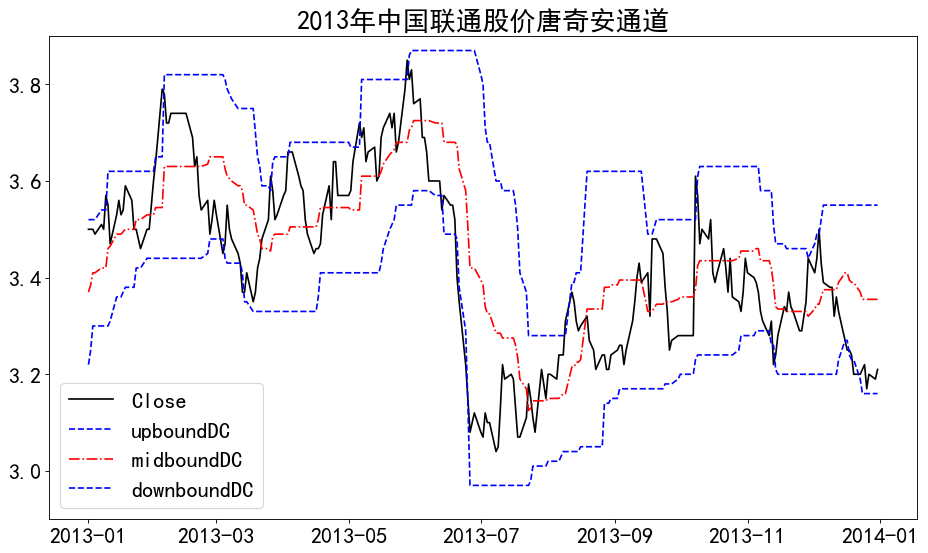

In [149]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(14,8),dpi=80)
plt.rc('font', family='SimHei', size=20)
plt.plot(Close['2013'],label="Close",color='k')
plt.plot(upboundDC['2013'],label="upboundDC",color='b',linestyle='dashed')
plt.plot(midboundDC['2013'],label="midboundDC",color='r',linestyle='-.')
plt.plot(downboundDC['2013'],label="downboundDC",color='b',linestyle='dashed')
plt.title("2013年中国联通股价唐奇安通道")
plt.ylim(2.9,3.9)
plt.legend()
plt.show()

In [150]:
upDownDC=pd.DataFrame({'upboundDC':upboundDC,\
                      'downboundDC':downboundDC})
ChinaUnicom13=ChinaUnicom['2013-01-01':'2013-06-28']
upDownDC13=upDownDC['2013-01-01':'2013-06-28']

E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


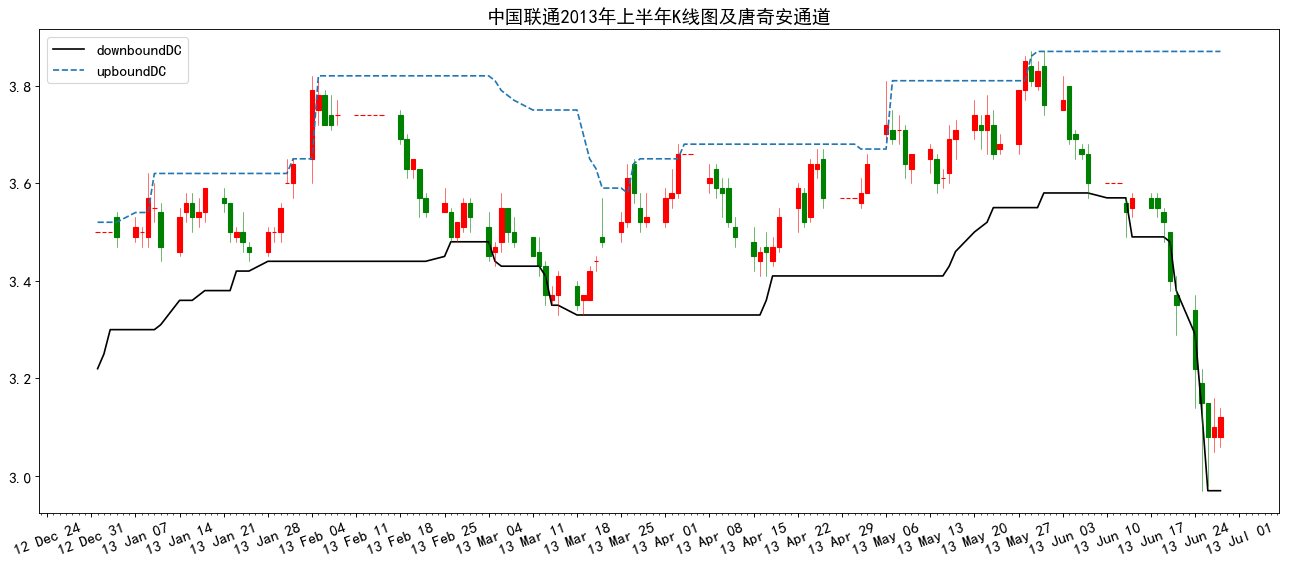

In [151]:
import candle
plt.figure(figsize=(20,8),dpi=80)
plt.rc('font', family='SimHei', size=14)
candle.candleLinePlots(candleData=ChinaUnicom13,\
        candleTitle='中国联通2013年上半年K线图及唐奇安通道',\
        splitFigures=False,Data=upDownDC13)

In [152]:
def upbreak(tsLine,tsRefLine):
    n=min(len(tsLine),len(tsRefLine))
    tsLine=tsLine[-n:]
    tsRefLine=tsRefLine[-n:]
    signal=pd.Series(0,index=tsLine.index)
    for i in range(1,len(tsLine)):
        if all([tsLine[i]>tsRefLine[i],tsLine[i-1]<tsRefLine[i-1]]):
            signal[i]=1
    return(signal)

In [153]:
def downbreak(tsLine,tsRefLine):
    n=min(len(tsLine),len(tsRefLine))
    tsLine=tsLine[-n:]
    tsRefLine=tsRefLine[-n:]
    signal=pd.Series(0,index=tsLine.index)
    for i in range(1,len(tsLine)):
        if all([tsLine[i]<tsRefLine[i],tsLine[i-1]>tsRefLine[i-1]]):
            signal[i]=1
    return(signal)

# DC Strategy

In [155]:
UpBreak=upbreak(Close[upboundDC.index[0]:],upboundDC)
DownBreak=downbreak(Close[downboundDC.index[0]:],\
          downboundDC)
BreakSig=UpBreak-DownBreak

In [156]:
tradeSig=BreakSig.shift(1)
ret=Close/Close.shift(1)-1
tradeRet=(ret*tradeSig).dropna()
tradeRet[tradeRet==0]=0
winRate=len(tradeRet[tradeRet>0]\
            )/len(tradeRet[tradeRet!=0])
winRate

0.45614035087719296

# 40日DC

In [158]:
upboundDC2=pd.Series(0.0,index=Close.index)
downboundDC2=pd.Series(0.0,index=Close.index)
midboundDC2=pd.Series(0.0,index=Close.index)

In [159]:
for i in range(40,len(Close)):
    upboundDC2[i]=max(High[(i-40):i])
    downboundDC2[i]=min(Low[(i-40):i])
    midboundDC2[i]=0.5*(upboundDC2[i]+downboundDC2[i])

In [160]:
upboundDC2=upboundDC2[40:]
downboundDC2=downboundDC2[40:]
midboundDC2= midboundDC2[40:]

In [161]:
upDownDC2=pd.DataFrame({'upboundDC':upboundDC2,\
                      'downboundDC':downboundDC2})
ChinaUnicom13=ChinaUnicom['2013-01-01':'2013-06-28']
upDownDC2=upDownDC2['2013-01-01':'2013-06-28']

E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


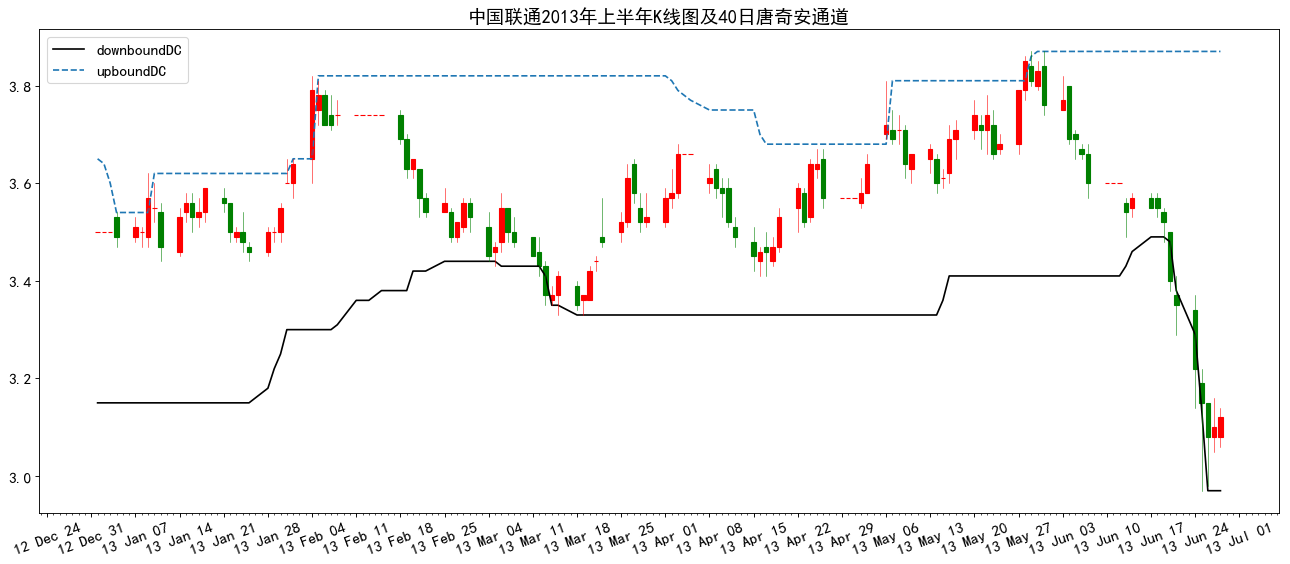

In [162]:
import candle
plt.figure(figsize=(20,8),dpi=80)
plt.rc('font', family='SimHei', size=14)
candle.candleLinePlots(candleData=ChinaUnicom13,\
        candleTitle='中国联通2013年上半年K线图及40日唐奇安通道',\
        splitFigures=False,Data=upDownDC2)

In [163]:
UpBreak2=upbreak(Close[upboundDC2.index[0]:],upboundDC2)
DownBreak2=downbreak(Close[downboundDC2.index[0]:],downboundDC2)
BreakSig2=UpBreak2-DownBreak2
tradeSig2=BreakSig2.shift(1)
tradeRet2=(ret*tradeSig2).dropna()
tradeRet2[tradeRet2==0]=0
winRate2=len(tradeRet2[tradeRet2>0]\
         )/len(tradeRet2[tradeRet2!=0])
winRate2

0.5

# BBands

In [164]:
def bbands(tsPrice,period=20,times=2):
    upBBand=pd.Series(0.0,index=tsPrice.index)
    midBBand=pd.Series(0.0,index=tsPrice.index)
    downBBand=pd.Series(0.0,index=tsPrice.index)
    sigma=pd.Series(0.0,index=tsPrice.index)
    for i in range(period-1,len(tsPrice)):
        midBBand[i]=np.nanmean(tsPrice[i-(period-1):(i+1)])
        sigma[i]=np.nanstd(tsPrice[i-(period-1):(i+1)])
        upBBand[i]=midBBand[i]+times*sigma[i]
        downBBand[i]=midBBand[i]-times*sigma[i]
    BBands=pd.DataFrame({'upBBand':upBBand[(period-1):],\
                         'midBBand':midBBand[(period-1):],\
                         'downBBand':downBBand[(period-1):],\
                         'sigma':sigma[(period-1):]})
    return(BBands)

In [165]:
UnicomBBands=bbands(Close,20,2)
UnicomBBands.head()

,downBBand,midBBand,sigma,upBBand
Date,,,,
2010-01-29,6.757043,7.2775,0.260228,7.797957
2010-02-01,6.688927,7.2575,0.284286,7.826073
2010-02-02,6.602137,7.2215,0.309682,7.840863
2010-02-03,6.545001,7.1975,0.326250,7.849999
2010-02-04,6.487599,7.1790,0.345701,7.870401


In [166]:
upDownBB=UnicomBBands[['downBBand','upBBand']]
upDownBB13=upDownBB['2013-01-01':'2013-06-28']

E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


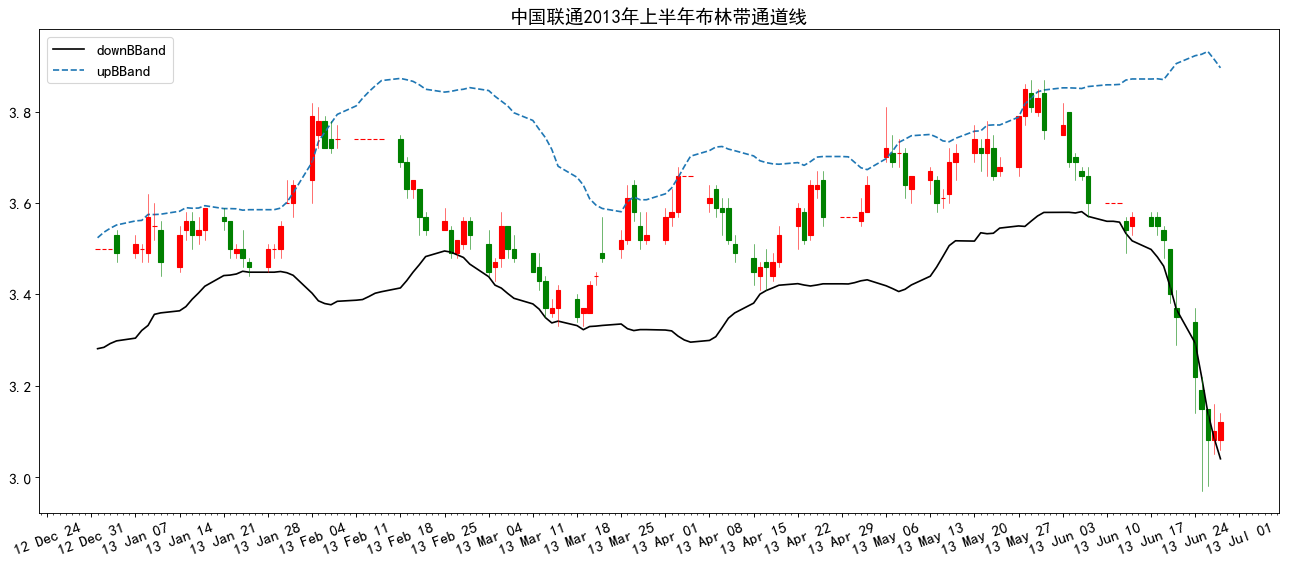

In [167]:
import candle
plt.figure(figsize=(20,8),dpi=80)
plt.rc('font', family='SimHei', size=14)
candle.candleLinePlots(candleData=ChinaUnicom13,\
        candleTitle='中国联通2013年上半年布林带通道线',\
                       splitFigures=False,Data=upDownBB13)

In [168]:
def CalBollRisk(tsPrice,multiplier):
    k=len(multiplier)
    overUp=[]
    belowDown=[]
    BollRisk=[]
    for i in range(k):
        BBands=bbands(tsPrice,20,multiplier[i])
        a=0
        b=0
        for j in range(len(BBands)):
            tsPrice=tsPrice[-(len(BBands)):]
            if tsPrice[j]>BBands.upBBand[j]:
                a+=1
            elif tsPrice[j]<BBands.downBBand[j]:
                b+=1
        overUp.append(a)
        belowDown.append(b)
        BollRisk.append(100*(a+b)/len(tsPrice))
    return(BollRisk)

In [169]:
multiplier=[1,1.65,1.96,2,2.58]
price2010=Close['2010-01-04':'2010-12-31']
CalBollRisk(price2010,multiplier)

[51.98237885462555,
 22.596153846153847,
 12.698412698412698,
 11.764705882352942,
 3.9735099337748343]

In [170]:
price2011=Close['2011-01-04':'2011-12-31']
CalBollRisk(price2011,multiplier)

[53.57142857142857,
 22.4390243902439,
 9.67741935483871,
 9.580838323353293,
 3.3783783783783785]

In [171]:
price2012=Close['2012-01-04':'2012-12-31']
CalBollRisk(price2012,multiplier)

[57.5,
 30.316742081447963,
 16.831683168316832,
 16.39344262295082,
 1.829268292682927]

In [172]:
price2013=Close['2013-01-04':'2013-12-31']
CalBollRisk(price2013,multiplier)

[53.78151260504202,
 20.091324200913242,
 10.5,
 9.94475138121547,
 1.8518518518518519]

# strategy

In [173]:
BBands=bbands(Close,20,2)

upbreakBB1=upbreak(Close,BBands.upBBand)
downbreakBB1=downbreak(Close,BBands.downBBand)

upBBSig1=-upbreakBB1.shift(2)
downBBSig1=downbreakBB1.shift(2)

tradSignal1=upBBSig1+downBBSig1
tradSignal1[tradSignal1==0]=0

In [174]:
def perform(tsPrice,tsTradSig):
    ret=tsPrice/tsPrice.shift(1)-1
    tradRet=(ret*tsTradSig).dropna()
    ret=ret[-len(tradRet):]
    winRate=[len(ret[ret>0])/len(ret[ret!=0]),\
             len(tradRet[tradRet>0])/len(tradRet[tradRet!=0])]
    meanWin=[np.mean(ret[ret>0]),\
             np.mean(tradRet[tradRet>0])]
    meanLoss=[np.mean(ret[ret<0]),\
             np.mean(tradRet[tradRet<0])]
    Performance=pd.DataFrame({'winRate':winRate,'meanWin':meanWin,\
                             'meanLoss':meanLoss})
    Performance.index=['Stock','Trade']
    return(Performance)

In [175]:
Performance1= perform(Close,tradSignal1)
Performance1

,meanLoss,meanWin,winRate
Stock,-0.012599,0.013320,0.458525
Trade,-0.011710,0.014709,0.557692


In [176]:
upbreakBB2=upbreak(Close,BBands.downBBand)
downbreakBB2=downbreak(Close,BBands.upBBand)

In [177]:
upBBSig2=upbreakBB2.shift(2)
downBBSig2=-downbreakBB2.shift(2)
tradSignal2=upBBSig2+downBBSig2
tradSignal2[tradSignal2==0]=0

In [178]:
Performance2= perform(Close,tradSignal2)
Performance2

,meanLoss,meanWin,winRate
Stock,-0.012599,0.013320,0.458525
Trade,-0.010517,0.014584,0.529412


In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import candle
import os
os.chdir('G:\\freecloud\\ThinkpadC_space\\Desktop\\资料\\资料\量化投资：以Python为工具\\PythonANS')

In [180]:
def bbands(tsPrice,period=20,times=2):
    upBBand=pd.Series(0.0,index=tsPrice.index)
    midBBand=pd.Series(0.0,index=tsPrice.index)
    downBBand=pd.Series(0.0,index=tsPrice.index)
    sigma=pd.Series(0.0,index=tsPrice.index)
    for i in range(period-1,len(tsPrice)):
        midBBand[i]=np.nanmean(tsPrice[i-(period-1):(i+1)])
        sigma[i]=np.nanstd(tsPrice[i-(period-1):(i+1)])
        upBBand[i]=midBBand[i]+times*sigma[i]
        downBBand[i]=midBBand[i]-times*sigma[i]
    BBands=pd.DataFrame({'upBBand':upBBand[(period-1):],\
                         'midBBand':midBBand[(period-1):],\
                         'downBBand':downBBand[(period-1):],\
                         'sigma':sigma[(period-1):]})
    return(BBands)

# 1.获取标普500指数(股票名称"^GSPC")2014年度日交易数据
# ①绘制其前两个月的K线图，在K线图中绘制收盘价曲线

In [181]:
GSPC = pd.read_csv('Data/Part5/005/problem31-1.csv',
                index_col='date')
                
GSPC.index.name='Date'

GSPC.index = pd.to_datetime(GSPC.index,format='%Y-%m-%d')

GSPC1 = GSPC[:'2014-02']

In [182]:
GSPC1.tail(2)

,Open,High,Low,Close,Volume,Adjusted
Date,,,,,,
2014-02-27,1844.900024,1854.530029,1841.130005,1854.290039,3.547460e+09,1854.290039
2014-02-28,1855.119995,1867.920044,1847.670044,1859.449951,3.917450e+09,1859.449951


E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


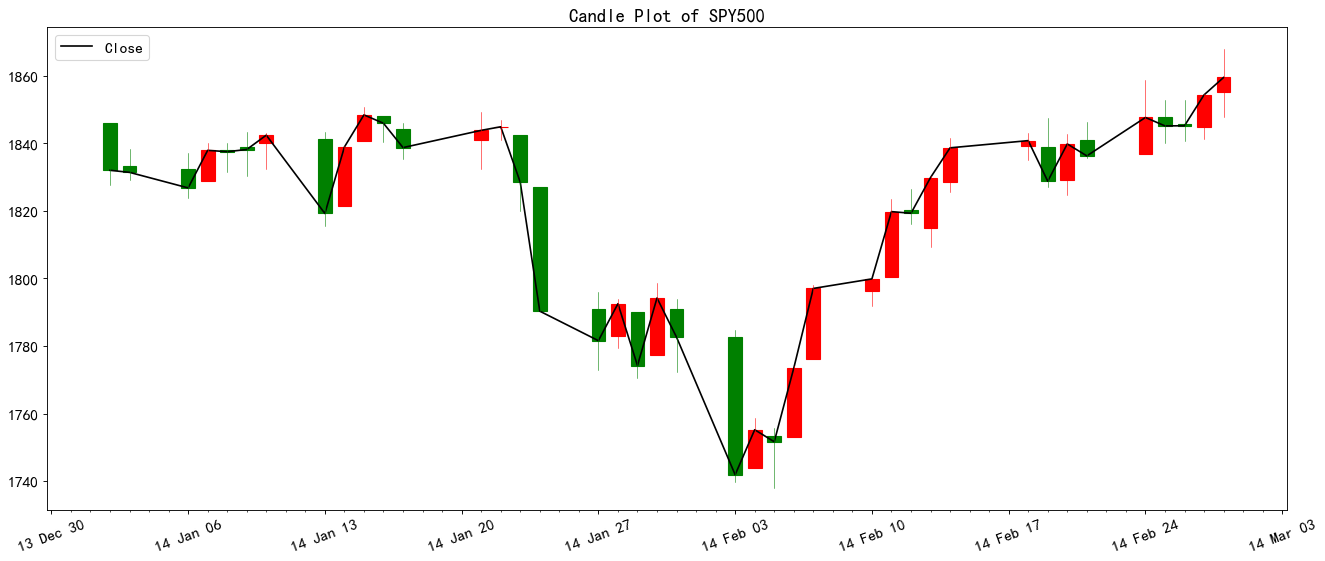

In [183]:
plt.figure(figsize=(20,8),dpi=80)
plt.rc('font', family='SimHei', size=14)
candle.candleLinePlots(GSPC1,
  candleTitle='Candle Plot of SPY500',
  splitFigures=False,Data=GSPC1.Close)

# ②计算布林带通道，在K线图中添加布林带线，分析收盘价与布林带之间的关系

E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


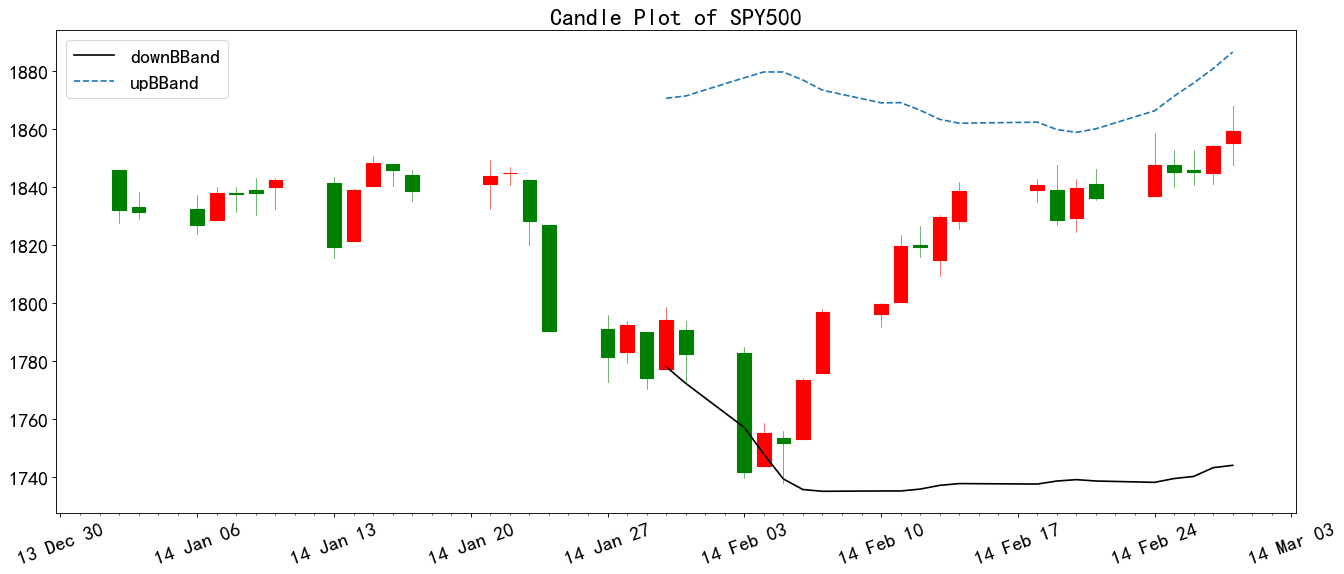

In [184]:
plt.figure(figsize=(20,8),dpi=80)
plt.rc('font', family='SimHei', size=18)
candle.candleLinePlots(GSPC1,candleTitle='Candle Plot of SPY500',
                       splitFigures=False,Data=bbands(GSPC1.Close)[['downBBand','upBBand']])

# ③以10天为之间跨度，使用唐奇安通道策略，绘制标普500指数的上下两条通道线

E:\Data_analysis_plan\python_36_install\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).max()
  """Entry point for launching an IPython kernel.
E:\Data_analysis_plan\python_36_install\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_min is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).min()
  


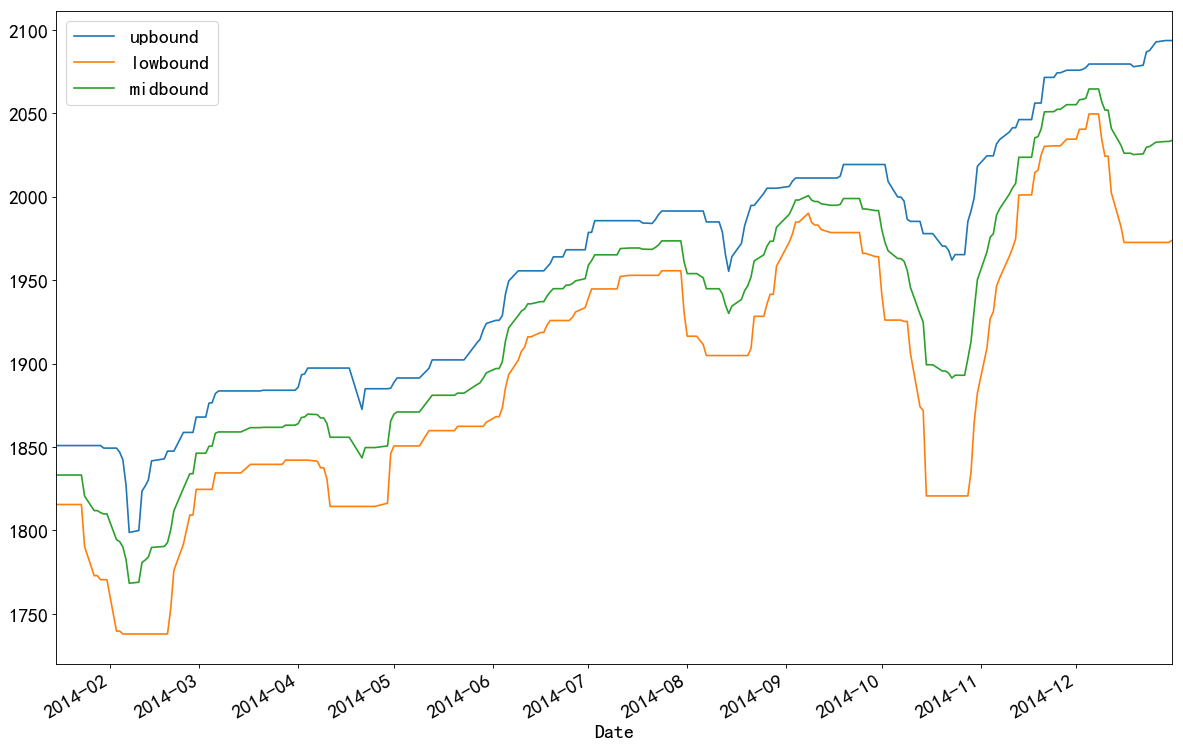

In [185]:
upbound = pd.rolling_max(GSPC.High,10)
lowbound = pd.rolling_min(GSPC.Low,10)
midbound = (upbound+lowbound)/2
bounds = pd.concat([upbound,lowbound,midbound],1)
bounds.columns=['upbound','lowbound','midbound']
plt.figure(figsize=(18,12),dpi=80)
matplotlib.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=18)
axe1=plt.subplot(111)
#在第一个画面中画出序列的自相关系数图 
plot1=bounds.dropna().plot(ax=axe1)
plt.show()

# ④以10天为时间跨度计算简单移动平均数，作为布林带通道的中间线取值；以前10日收盘价1.5倍标准差为基准，求出布林带上下通道值，绘制布林带通道的三条线

E:\Data_analysis_plan\python_36_install\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()
  """Entry point for launching an IPython kernel.
E:\Data_analysis_plan\python_36_install\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  


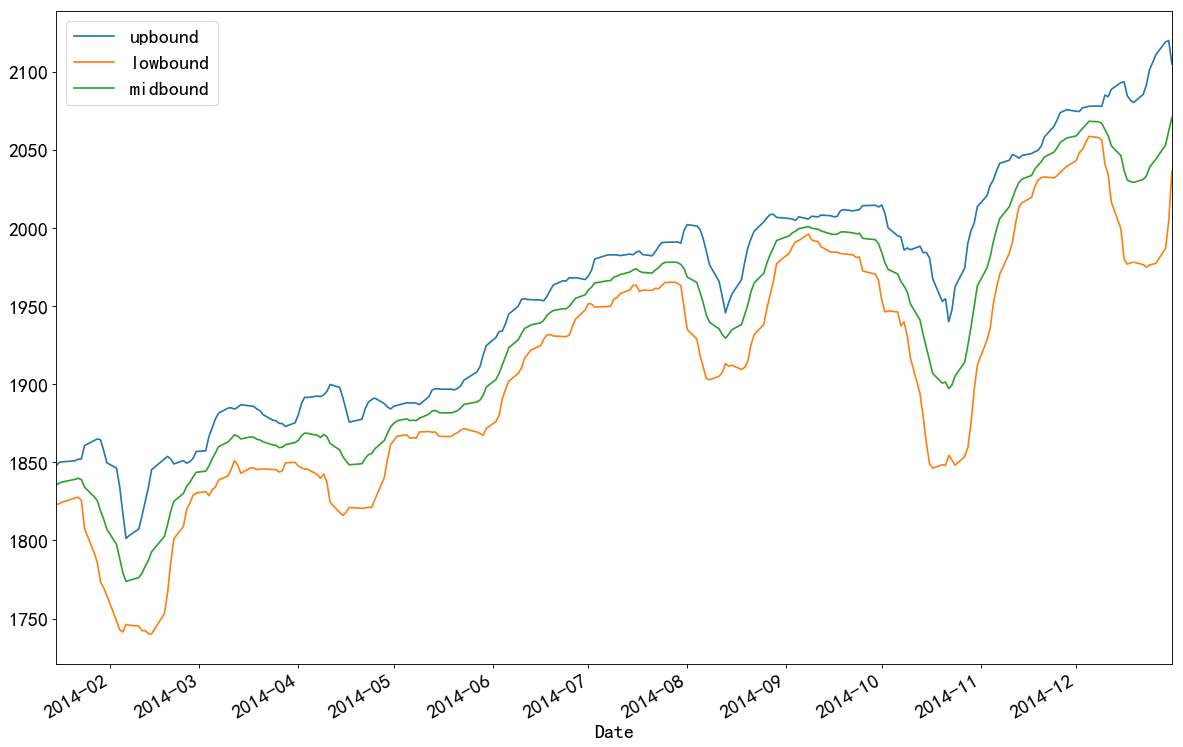

In [186]:
std = pd.rolling_std(GSPC.Close,10)
midbound = pd.rolling_mean(GSPC.Close,10)
upbound = midbound + 1.5 * std
lowbound = midbound - 1.5 * std
bounds = pd.concat([upbound,lowbound,midbound],1)
bounds.columns=['upbound','lowbound','midbound']
plt.figure(figsize=(18,12),dpi=80)
matplotlib.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=18)
axe1=plt.subplot(111)
#在第一个画面中画出序列的自相关系数图 
plot1=bounds.dropna().plot(ax=axe1)
plt.show()

# 2.%b指标是由布林带指标衍生出的一种指标，用以刻画收盘价曲线在布林带通道中的相对位置
# ①使用上题原数据，计算此指标值并绘制线图

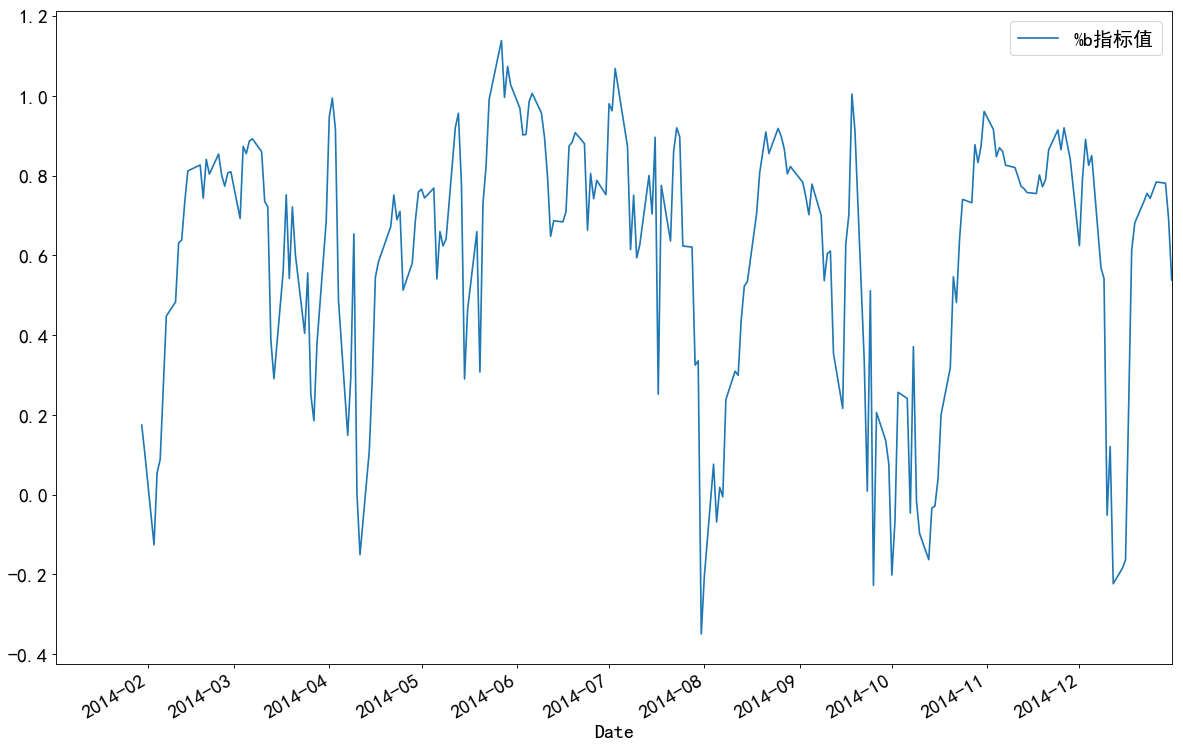

In [187]:
bounds = bbands(GSPC.Close)
bvalue = (GSPC.Close - bounds.downBBand)/(bounds.upBBand-bounds.downBBand)
plt.figure(figsize=(18,12),dpi=80)
matplotlib.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=18)
axe1=plt.subplot(111)
#在第一个画面中画出序列的自相关系数图 
plot1=bvalue.plot(ax=axe1,label='%b指标值')
plt.legend()
plt.show()

# ②使用布林带线交易策略加上该指标的取值情况，制定交易策略

In [188]:
bvalue = bvalue.dropna()
dat = pd.concat([GSPC.Close,bvalue],1).dropna()
dat.columns = ['price','bvalue']
asset = 100000 * np.ones(len(dat))
cash = 100000 * np.ones(len(dat))
share = np.zeros(len(dat))

for i in range(1,len(dat)):
    cash[i]=cash[i-1]+share[i-1]*dat.price[i]
    asset[i]=cash[i]
    if dat.bvalue[i-1]<0:
        share[i]=100
        cash[i]=cash[i]-100*dat.price[i]
    elif dat.bvalue[i-1]>0:
        share[i]=-100
        cash[i]=cash[i]+100*dat.price[i]

# 3.使用第一题2014年度的原数据，计算其带宽指标

In [189]:
BW = (bounds.upBBand - bounds.downBBand)/bounds.midBBand
BW.describe()

count    233.000000
mean       0.046497
std        0.023566
min        0.012923
25%        0.028057
50%        0.042070
75%        0.061352
max        0.119867
dtype: float64

# 4.使用第一题的原数据，计算多空布林线指标的上中下三条轨道值，绘制其曲线图

E:\Data_analysis_plan\python_36_install\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
  """Entry point for launching an IPython kernel.
E:\Data_analysis_plan\python_36_install\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  """Entry point for launching an IPython kernel.
E:\Data_analysis_plan\python_36_install\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.
E:\Data_analysis_plan\python_36_install\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated f

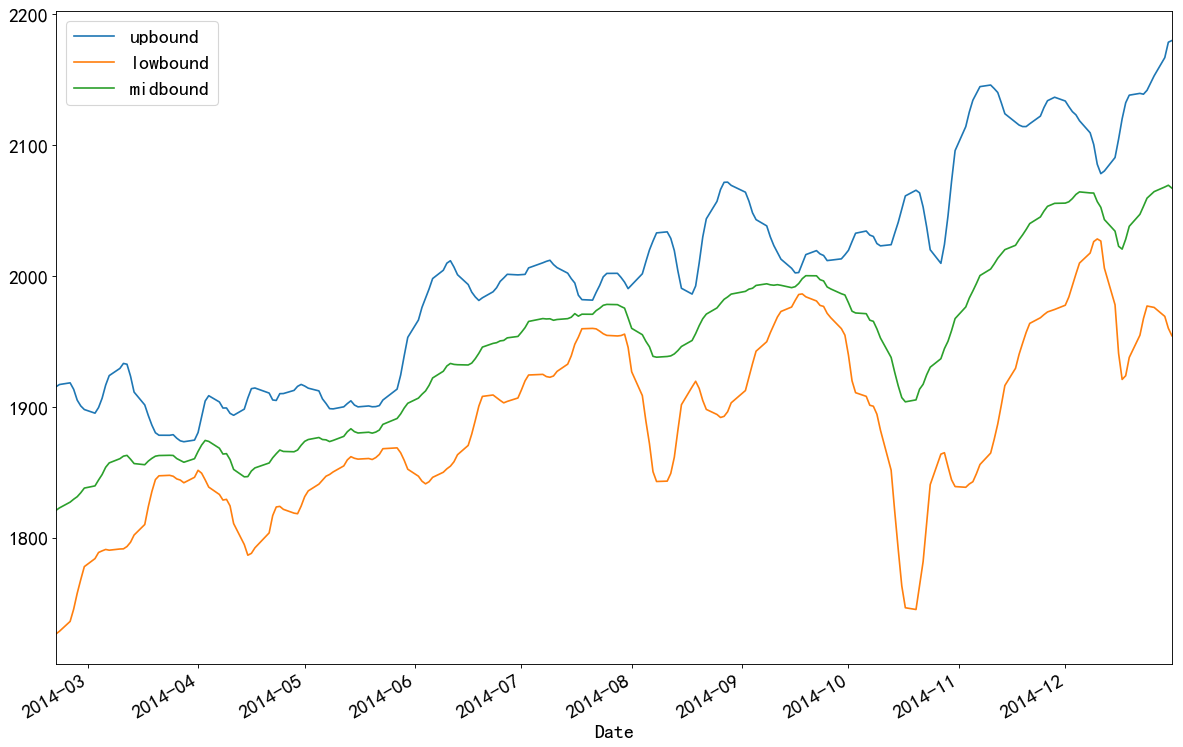

In [190]:
midbound = (pd.rolling_mean(GSPC.Close,3) + pd.rolling_mean(GSPC.Close,6)\
           + pd.rolling_mean(GSPC.Close,12) + pd.rolling_mean(GSPC.Close,24))/4

std = pd.rolling_std(midbound,11)

upbound = midbound + 6 * std
lowbound = midbound - 6 * std
bounds = pd.concat([upbound,lowbound,midbound],1)
bounds.columns=['upbound','lowbound','midbound']
plt.figure(figsize=(18,12),dpi=80)
matplotlib.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=18)
axe1=plt.subplot(111)
#在第一个画面中画出序列的自相关系数图 
plot1=bounds.dropna().plot(ax=axe1,label=' 多空布林带指标')
plt.legend()
plt.show()